<a href="https://colab.research.google.com/github/RakeshSharma21/Sessions_Notebook/blob/main/EDA_Live_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Live Coding Session

# Exploratory Data Analysis (EDA) – Live Coding Session

## Why this notebook?
This notebook demonstrates how a data scientist:
1. Understands raw data
2. Cleans and prepares it
3. Explores distributions and relationships
4. Engineers features
5. Selects relevant features for modeling

EDA is not optional — it is the foundation of all reliable analytics and ML work.


## Import Required Libraries (Code)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use("default")
sns.set_theme(style="whitegrid")

## PHASE 1: DATASET UNDERSTANDING

### Description

- pandas, numpy → data manipulation

- matplotlib, seaborn → visualization

- Visualization theme improves readability

### Load Dataset (Code)

In [34]:
# Load the messy e-commerce dataset
df = pd.read_csv('/ecommerce_customer_data.csv')

In [35]:
print("📊 DATASET LOADED SUCCESSFULLY!")
print(f"Shape: {df.shape}")
print("\n" + "="*60)
print("1. FIRST LOOK AT DATA")
print("="*60)
print(df.head(10))

📊 DATASET LOADED SUCCESSFULLY!
Shape: (510, 12)

1. FIRST LOOK AT DATA
   Customer_ID   Age Purchase_Date Product_Category  Purchase_Amount  \
0         1360  53.0    2024-02-25           Sports            53.26   
1         1017  22.0    2023-08-11             Home            40.92   
2         1386  55.0    2024-08-09            Books           171.21   
3         1259  61.0    2024-02-21         Clothing            28.03   
4         1032  35.0    2023-05-05         Clothing           201.51   
5         1009  65.0    2024-03-14         Clothing            35.04   
6         1458  59.0    2023-12-09           Sports            61.31   
7         1424  59.0    2023-12-27      Electronics            47.95   
8         1206   NaN    2023-01-07         Clothing           197.71   
9         1095  71.0    2024-07-16      Electronics            63.61   

   Quantity  Discount_Percentage  Shipping_Days  Customer_Satisfaction  \
0         5                   15           16.0               

### Dataset Shape (Code)

In [36]:
df.shape

(510, 12)

### Description

- Shows (rows, columns)

- Helps estimate:

  - dataset size

  - memory concerns

  - suitability for modeling

### Dataset Structure & Types (Code)

In [37]:
print("="*60)
print("2. DATA TYPES & STRUCTURE")
print("="*60)
print(df.dtypes)
print(f"\nDataset Info:")
print(df.info())

2. DATA TYPES & STRUCTURE
Customer_ID                int64
Age                      float64
Purchase_Date             object
Product_Category          object
Purchase_Amount          float64
Quantity                   int64
Discount_Percentage        int64
Shipping_Days            float64
Customer_Satisfaction    float64
Return_Status             object
Payment_Method            object
Region                    object
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            510 non-null    int64  
 1   Age                    480 non-null    float64
 2   Purchase_Date          510 non-null    object 
 3   Product_Category       510 non-null    object 
 4   Purchase_Amount        510 non-null    float64
 5   Quantity               510 non-null    int64  
 6   Discount_Percentage    

### Description

#### Identifies:

- data types (numeric / categorical)

- missing values

- Critical before cleaning

Prevents incorrect assumptions (e.g., numeric stored as object)

### Statistical Summary (Code)

In [38]:
# DESCRIPTIVE STATISTICS
print("="*60)
print("4. DESCRIPTIVE STATISTICS (RAW DATA)")
print("="*60)
print(df.describe())



4. DESCRIPTIVE STATISTICS (RAW DATA)
       Customer_ID         Age  Purchase_Amount    Quantity  \
count   510.000000  480.000000       510.000000  510.000000   
mean   1245.696078   45.795833        90.126824    5.009804   
std     147.041471   16.919680       122.905818    2.506162   
min    1001.000000   18.000000        20.250000    1.000000   
25%    1118.250000   31.000000        34.430000    3.000000   
50%    1245.500000   46.000000        57.975000    5.000000   
75%    1372.750000   61.000000        92.242500    7.000000   
max    1500.000000   74.000000       921.860000    9.000000   

       Discount_Percentage  Shipping_Days  Customer_Satisfaction  
count           510.000000     484.000000              489.00000  
mean             12.647059      16.421488                2.96728  
std               8.551987      13.203301                1.41673  
min               0.000000       1.000000                1.00000  
25%               5.000000       8.000000                2.0

### Description

#### Provides:

- mean, median, min, max

- quartiles

#### Early signals of:

- skewness

- outliers

- unusual ranges

### MISSING VALUES CHECK


In [39]:
# MISSING VALUES CHECK
print("="*60)
print("3. MISSING VALUES ANALYSIS")
print("="*60)
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing_summary[missing_summary['Missing_Count'] > 0])



3. MISSING VALUES ANALYSIS
                                      Column  Missing_Count  \
Age                                      Age             30   
Shipping_Days                  Shipping_Days             26   
Customer_Satisfaction  Customer_Satisfaction             21   

                       Missing_Percentage  
Age                                  5.88  
Shipping_Days                        5.10  
Customer_Satisfaction                4.12  


### DUPLICATES CHECK

In [40]:
# DUPLICATES CHECK
print(f"\nDuplicates: {df.duplicated().sum()}")


Duplicates: 10


## PHASE 2: DATA CLEANING

### DATA CLEANING & WRANGLING

In [41]:
# =============================================================================
# PHASE 2: DATA CLEANING & WRANGLING
# =============================================================================

print("🧹 STARTING DATA CLEANING...")

# 2.1 FIX DATA TYPES
print("\n1. FIXING DATA TYPES...")
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

print("✅ Data types fixed!")
print(df.dtypes)


🧹 STARTING DATA CLEANING...

1. FIXING DATA TYPES...
✅ Data types fixed!
Customer_ID                       int64
Age                             float64
Purchase_Date            datetime64[ns]
Product_Category                 object
Purchase_Amount                 float64
Quantity                          int64
Discount_Percentage               int64
Shipping_Days                   float64
Customer_Satisfaction           float64
Return_Status                    object
Payment_Method                   object
Region                           object
dtype: object


### HANDLE MISSING VALUES

In [42]:
# 2.2 HANDLE MISSING VALUES
print("\n2. MISSING VALUE IMPUTATION...")

# Numeric columns - use median (robust to outliers)
median_age = df['Age'].median()
median_shipping = df['Shipping_Days'].median()
mode_satisfaction = df['Customer_Satisfaction'].mode()[0]

df['Age'].fillna(median_age, inplace=True)
df['Shipping_Days'].fillna(median_shipping, inplace=True)
df['Customer_Satisfaction'].fillna(mode_satisfaction, inplace=True)

print("✅ Missing values imputed!")
print("Missing values after cleaning:")
print(df.isnull().sum().sum())  # Should be 0



2. MISSING VALUE IMPUTATION...
✅ Missing values imputed!
Missing values after cleaning:
0


### REMOVE DUPLICATES

In [43]:
# 2.3 REMOVE DUPLICATES
print("\n3. REMOVE DUPLICATES...")
initial_rows = len(df)
df = df.drop_duplicates().reset_index(drop=True)
print(f"✅ Removed {initial_rows - len(df)} duplicate rows")
print(f"New shape: {df.shape}")


3. REMOVE DUPLICATES...
✅ Removed 10 duplicate rows
New shape: (500, 12)


### OUTLIER DETECTION & HANDLING


4. OUTLIER DETECTION (IQR METHOD)...
Purchase_Amount: [-52.5, 178.6] → 40 outliers


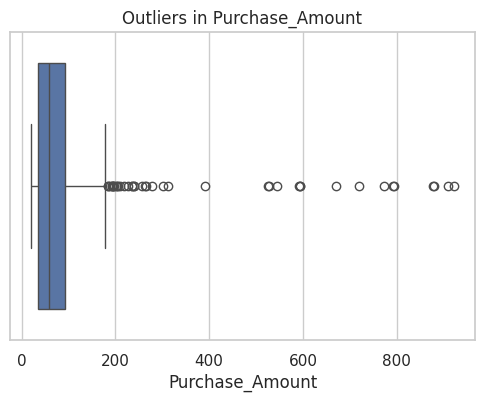

Shipping_Days: [-11.1, 41.9] → 10 outliers


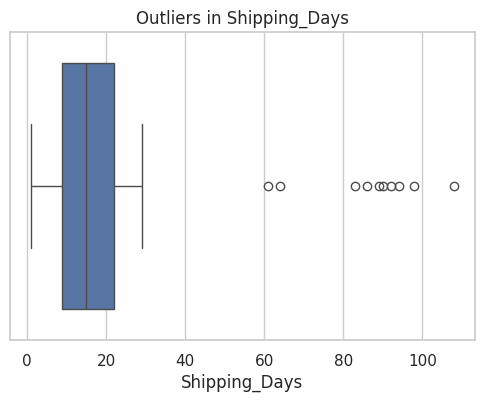

Age: [-11.4, 101.6] → 0 outliers


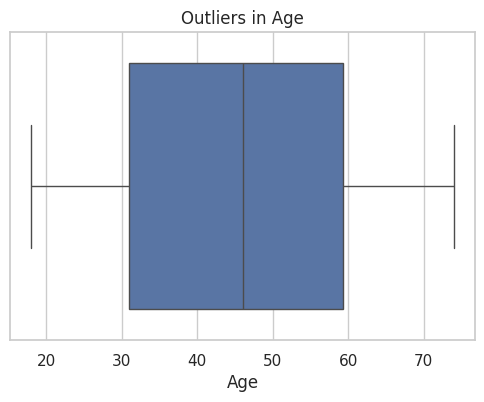

✅ Outliers capped!


In [44]:
# 2.4 OUTLIER DETECTION & HANDLING
print("\n4. OUTLIER DETECTION (IQR METHOD)...")

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return lower_bound, upper_bound, len(outliers)

# Check key columns
for col in ['Purchase_Amount', 'Shipping_Days', 'Age']:
    lower, upper, count = detect_outliers_iqr(df, col)
    print(f"{col}: [{lower:.1f}, {upper:.1f}] → {count} outliers")
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()

# CAP OUTLIERS (instead of removing)
df['Purchase_Amount_Capped'] = df['Purchase_Amount'].clip(
    *detect_outliers_iqr(df, 'Purchase_Amount')[:2]
)
df['Shipping_Days_Capped'] = df['Shipping_Days'].clip(
    *detect_outliers_iqr(df, 'Shipping_Days')[:2]
)

print("✅ Outliers capped!")


In [45]:
detect_outliers_iqr(df, 'Purchase_Amount')[:2]

(np.float64(-52.457499999999996), np.float64(178.6225))

### CLEAN DATA SUMMARY

In [46]:
# CLEAN DATA SUMMARY
print("\n" + "="*60)
print("✅ CLEAN DATA SUMMARY")
print("="*60)
print(f"Final shape: {df.shape}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Data types clean: {all(df.dtypes != 'object')}")
print("Ready for analysis! 🎉")


✅ CLEAN DATA SUMMARY
Final shape: (500, 14)
Missing values: 0
Data types clean: False
Ready for analysis! 🎉


### PHASE 3: DESCRIPTIVE STATISTICS

In [47]:
# =============================================================================
# PHASE 3: DESCRIPTIVE STATISTICS
# =============================================================================

print("📈 CALCULATING DESCRIPTIVE STATISTICS...")

numeric_cols = df.select_dtypes(include=[np.number]).columns

print("\n" + "="*60)
print("CENTRAL TENDENCY & SPREAD")
print("="*60)

for col in ['Age', 'Purchase_Amount', 'Shipping_Days', 'Customer_Satisfaction']:
    print(f"\n{col.upper()}:")
    print(f"  Mean:     {df[col].mean():.2f}")
    print(f"  Median:   {df[col].median():.2f}")
    print(f"  Mode:     {df[col].mode()[0]:.2f}")
    print(f"  Std Dev:  {df[col].std():.2f}")
    print(f"  Skewness: {df[col].skew():.2f}")

    if df[col].skew() > 0.5:
        print("  → RIGHT SKEWED")
    elif df[col].skew() < -0.5:
        print("  → LEFT SKEWED")


📈 CALCULATING DESCRIPTIVE STATISTICS...

CENTRAL TENDENCY & SPREAD

AGE:
  Mean:     45.78
  Median:   46.00
  Mode:     46.00
  Std Dev:  16.43
  Skewness: 0.00

PURCHASE_AMOUNT:
  Mean:     90.35
  Median:   57.62
  Mode:     23.11
  Std Dev:  123.89
  Skewness: 4.52
  → RIGHT SKEWED

SHIPPING_DAYS:
  Mean:     16.30
  Median:   15.00
  Mode:     15.00
  Std Dev:  12.93
  Skewness: 3.44
  → RIGHT SKEWED

CUSTOMER_SATISFACTION:
  Mean:     2.97
  Median:   3.00
  Mode:     3.00
  Std Dev:  1.39
  Skewness: 0.02


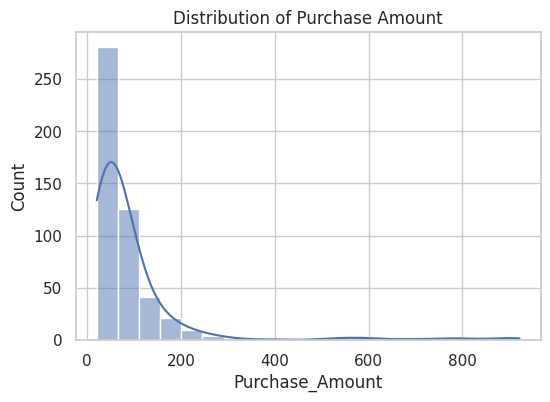

In [49]:
plt.figure(figsize=(6,4))
sns.histplot(df['Purchase_Amount'], bins=20, kde=True)
plt.title("Distribution of Purchase Amount")
plt.show()

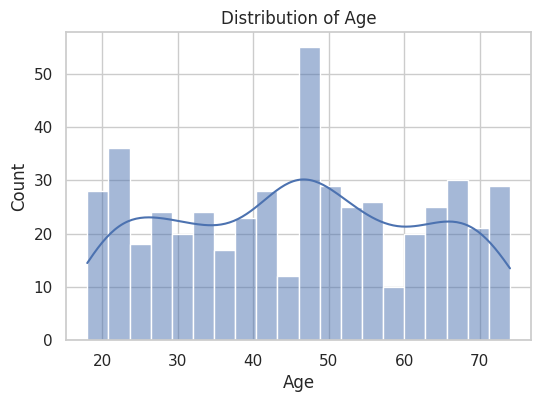

In [52]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.show()

### CATEGORICAL ANALYSIS

In [21]:
# CATEGORICAL ANALYSIS
print("\n" + "="*60)
print("CATEGORICAL VARIABLES")
print("="*60)

cat_cols = ['Product_Category', 'Return_Status', 'Payment_Method', 'Region']
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"  Most common: {df[col].mode()[0]}")



CATEGORICAL VARIABLES

Product_Category:
Product_Category
Home           108
Clothing       105
Books          104
Electronics    104
Sports          79
Name: count, dtype: int64
  Most common: Home

Return_Status:
Return_Status
Not Returned    417
Returned         64
In Process       19
Name: count, dtype: int64
  Most common: Not Returned

Payment_Method:
Payment_Method
Credit Card    130
UPI            128
Debit Card     121
PayPal         121
Name: count, dtype: int64
  Most common: Credit Card

Region:
Region
West       116
East       108
Central    102
South       98
North       76
Name: count, dtype: int64
  Most common: West


### PHASE 4: UNIVARIATE ANALYSIS

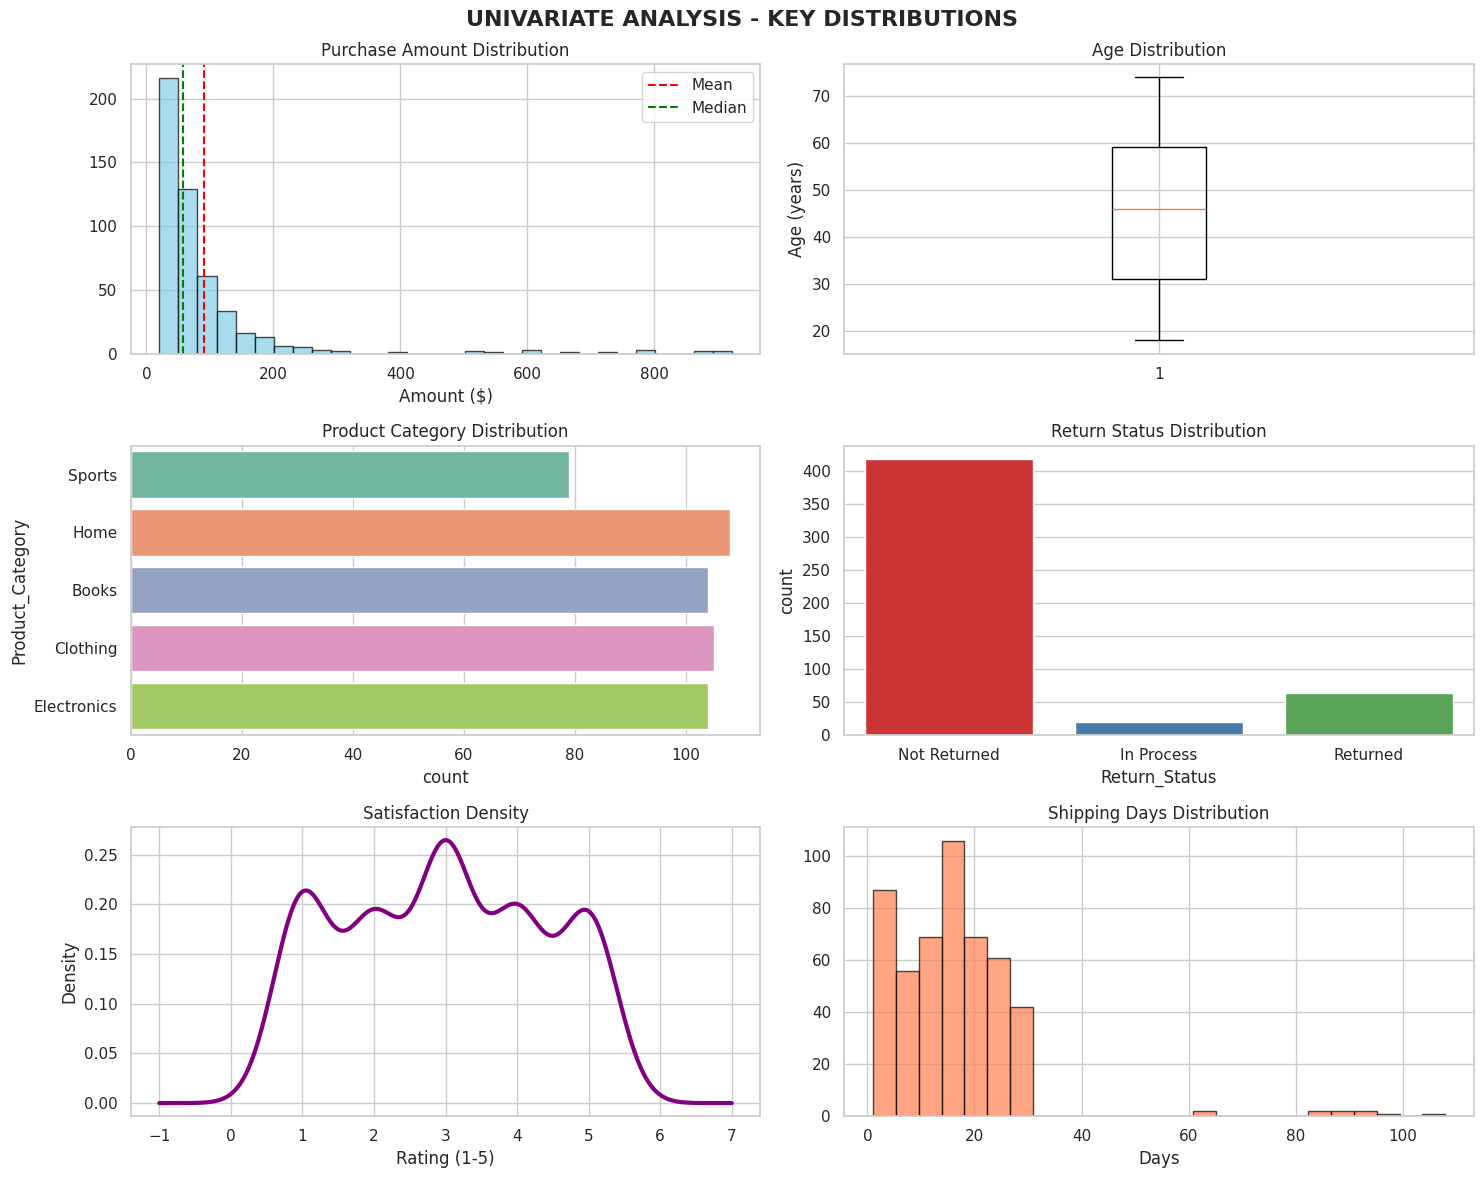

🔍 INSIGHTS:
- Purchase amount is RIGHT-SKEWED (few high-value purchases)
- 15% return rate
- Satisfaction peaks around 3-4
- Shipping shows outliers


In [22]:
# =============================================================================
# PHASE 4: UNIVARIATE VISUALIZATION
# =============================================================================

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('UNIVARIATE ANALYSIS - KEY DISTRIBUTIONS', fontsize=16, fontweight='bold')

# 1. HISTOGRAM - Purchase Amount
axes[0,0].hist(df['Purchase_Amount'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].axvline(df['Purchase_Amount'].mean(), color='red', linestyle='--', label='Mean')
axes[0,0].axvline(df['Purchase_Amount'].median(), color='green', linestyle='--', label='Median')
axes[0,0].set_title('Purchase Amount Distribution')
axes[0,0].set_xlabel('Amount ($)')
axes[0,0].legend()

# 2. BOXPLOT - Age
axes[0,1].boxplot(df['Age'])
axes[0,1].set_title('Age Distribution')
axes[0,1].set_ylabel('Age (years)')

# 3. COUNT PLOT - Product Category
sns.countplot(data=df, y='Product_Category', ax=axes[1,0], palette='Set2')
axes[1,0].set_title('Product Category Distribution')

# 4. COUNT PLOT - Return Status
sns.countplot(data=df, x='Return_Status', ax=axes[1,1], palette='Set1')
axes[1,1].set_title('Return Status Distribution')

# 5. DENSITY - Satisfaction
df['Customer_Satisfaction'].plot(kind='kde', ax=axes[2,0], color='purple', linewidth=3)
axes[2,0].set_title('Satisfaction Density')
axes[2,0].set_xlabel('Rating (1-5)')

# 6. HISTOGRAM - Shipping Days
axes[2,1].hist(df['Shipping_Days'], bins=25, color='coral', alpha=0.7, edgecolor='black')
axes[2,1].set_title('Shipping Days Distribution')
axes[2,1].set_xlabel('Days')

plt.tight_layout()
plt.show()

print("🔍 INSIGHTS:")
print("- Purchase amount is RIGHT-SKEWED (few high-value purchases)")
print("- 15% return rate")
print("- Satisfaction peaks around 3-4")
print("- Shipping shows outliers")


## PHASE 5: BIVARIATE ANALYSIS

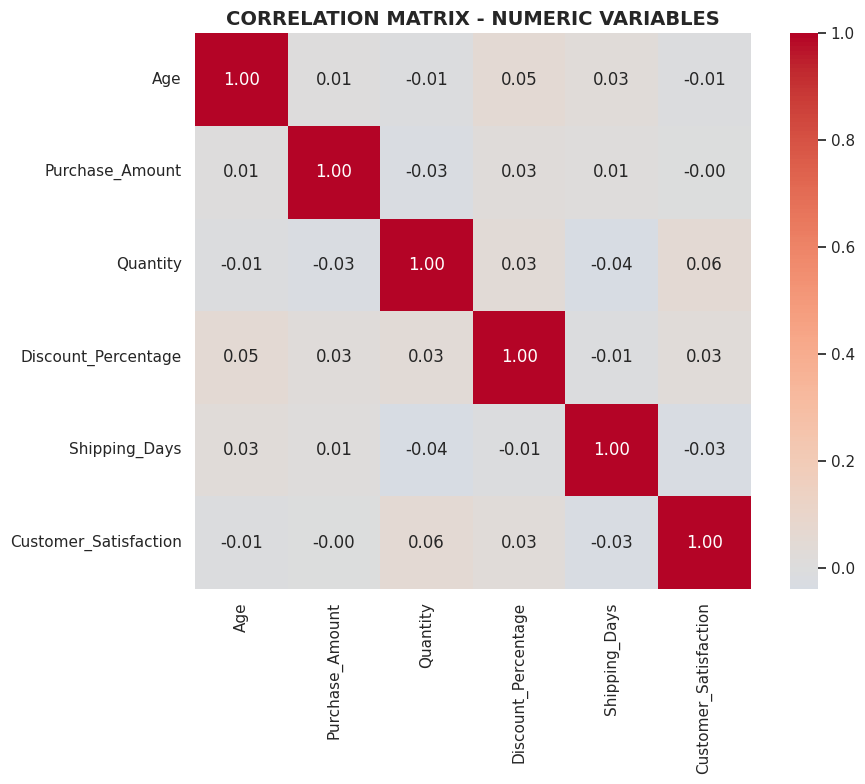

In [53]:
# =============================================================================
# PHASE 5: BIVARIATE ANALYSIS & CORRELATIONS
# =============================================================================

# CORRELATION MATRIX
numeric_df = df[['Age', 'Purchase_Amount', 'Quantity', 'Discount_Percentage',
                'Shipping_Days', 'Customer_Satisfaction']]

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('CORRELATION MATRIX - NUMERIC VARIABLES', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


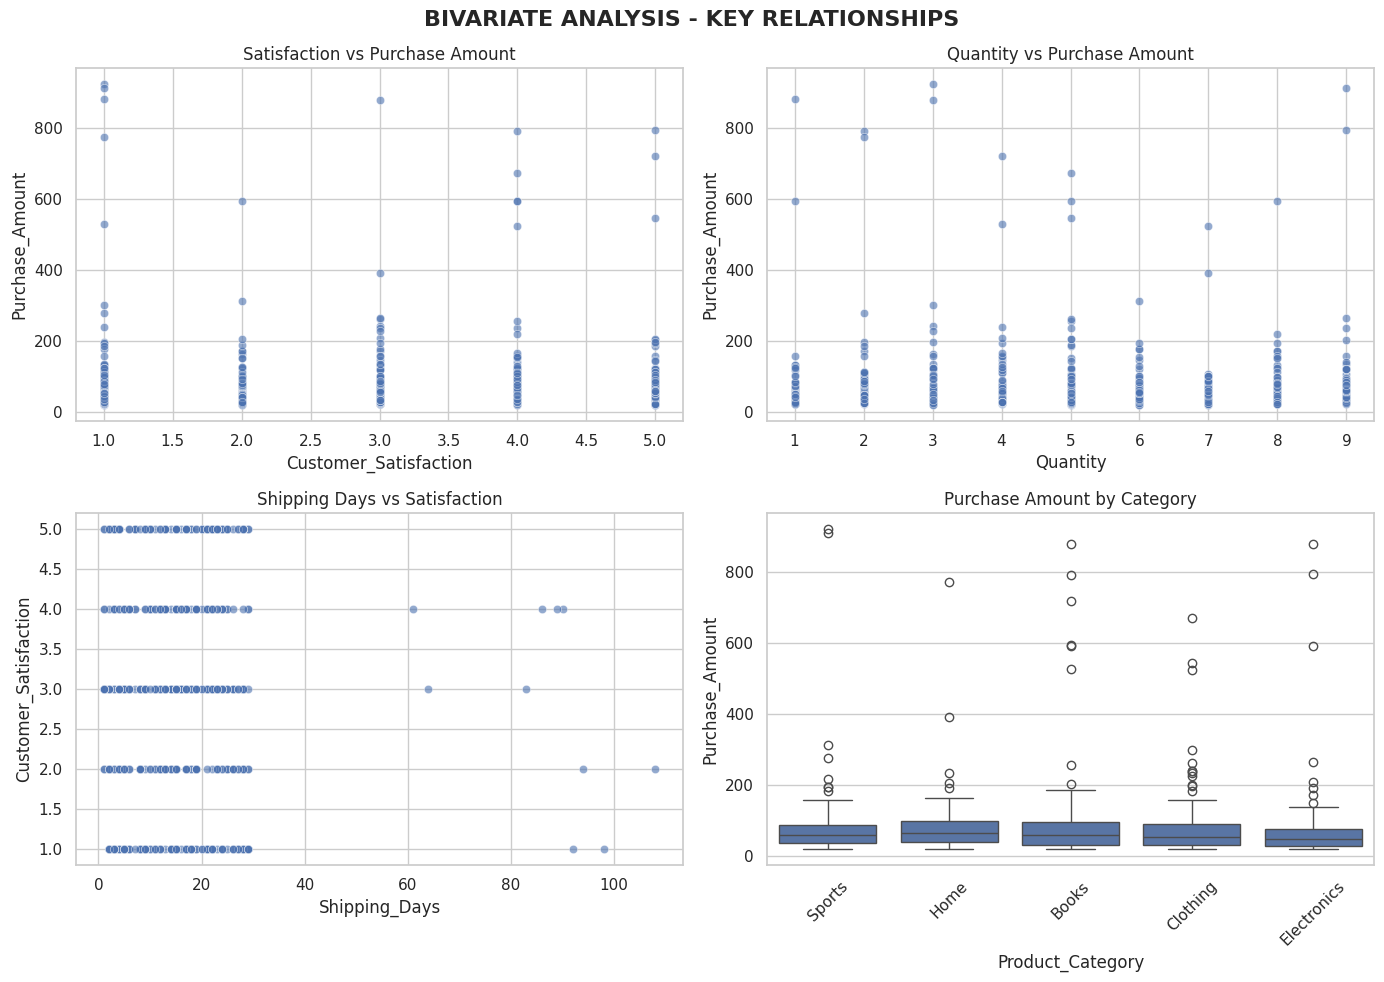

In [54]:
# SCATTER PLOTS - KEY RELATIONSHIPS
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('BIVARIATE ANALYSIS - KEY RELATIONSHIPS', fontsize=16, fontweight='bold')

# 1. Satisfaction vs Purchase Amount
sns.scatterplot(data=df, x='Customer_Satisfaction', y='Purchase_Amount', ax=axes[0,0], alpha=0.6)
axes[0,0].set_title('Satisfaction vs Purchase Amount')

# 2. Quantity vs Amount
sns.scatterplot(data=df, x='Quantity', y='Purchase_Amount', ax=axes[0,1], alpha=0.6)
axes[0,1].set_title('Quantity vs Purchase Amount')

# 3. Shipping vs Satisfaction
sns.scatterplot(data=df, x='Shipping_Days', y='Customer_Satisfaction', ax=axes[1,0], alpha=0.6)
axes[1,0].set_title('Shipping Days vs Satisfaction')

# 4. Amount by Category (boxplot)
sns.boxplot(data=df, x='Product_Category', y='Purchase_Amount', ax=axes[1,1])
axes[1,1].set_title('Purchase Amount by Category')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## PHASE 6: FEATURE ENGINEERING

In [55]:
# =============================================================================
# PHASE 6: FEATURE ENGINEERING
# =============================================================================

print("🔧 CREATING DERIVED FEATURES...")

# 1. Business metrics
df['Discount_Amount'] = (df['Purchase_Amount'] * df['Discount_Percentage']) / 100
df['Final_Price'] = df['Purchase_Amount'] - df['Discount_Amount']
df['Price_Per_Item'] = df['Final_Price'] / df['Quantity']

# 2. Categorization
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100],
                        labels=['18-25', '26-35', '36-45', '46-55', '55+'])
df['High_Value'] = (df['Purchase_Amount'] > df['Purchase_Amount'].quantile(0.75)).astype(int)

# 3. Temporal features
df['Purchase_Month'] = df['Purchase_Date'].dt.month
df['Purchase_Quarter'] = df['Purchase_Date'].dt.quarter
df['Is_Weekend'] = df['Purchase_Date'].dt.weekday >= 5

# 4. VIP Customer flag
df['Is_VIP'] = ((df['Purchase_Amount'] > df['Purchase_Amount'].quantile(0.75)) &
                (df['Customer_Satisfaction'] >= 4) &
                (df['Return_Status'] == 'Not Returned')).astype(int)

# 5. CLV Score (Customer Lifetime Value proxy)
df['CLV_Score'] = df['Purchase_Amount'] * df['Customer_Satisfaction'] * (df['Return_Status'] != 'Returned')

print("✅ New features created:")
print(df[['Discount_Amount', 'Price_Per_Item', 'Age_Group', 'Is_VIP', 'CLV_Score']].head())
print(f"\nDataset now has {df.shape[1]} columns!")


🔧 CREATING DERIVED FEATURES...
✅ New features created:
   Discount_Amount  Price_Per_Item Age_Group  Is_VIP  CLV_Score
0            7.989          9.0542     46-55       0     159.78
1            0.000         13.6400     18-25       0      40.92
2           34.242         17.1210     46-55       0     342.42
3            5.606         11.2120       55+       0     140.15
4           20.151         20.1510     26-35       1    1007.55

Dataset now has 24 columns!


### QUESTION 1: Customer Segmentation



QUESTION 1: CUSTOMER SEGMENTATION ANALYSIS
Segment Performance:
                 Customer_Satisfaction       Purchase_Amount            \
                                  mean count            mean       sum   
Customer_Segment                                                         
Low                               2.81   212           32.98   6992.74   
Medium                            3.12   230           81.52  18750.38   
High                              2.95    58          335.04  19432.60   

                 Return_Status Is_VIP  
                      <lambda>    sum  
Customer_Segment                       
Low                      14.62      0  
Medium                   11.30     25  
High                     12.07     21  


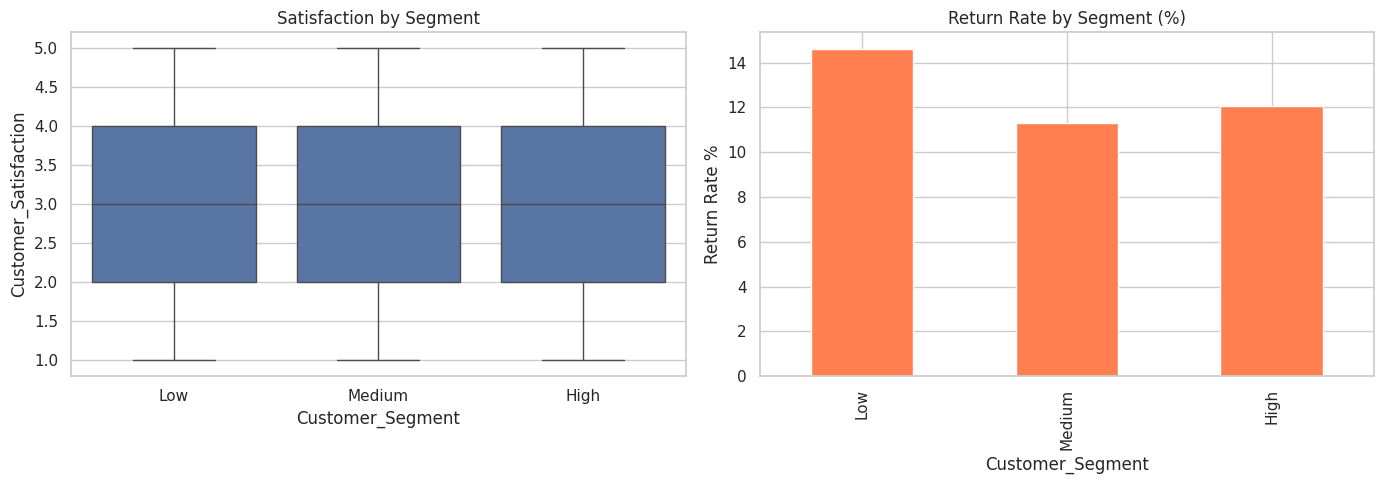


💡 INSIGHT: High-value customers have slightly lower satisfaction!


In [56]:
print("\n" + "="*70)
print("QUESTION 1: CUSTOMER SEGMENTATION ANALYSIS")
print("="*70)

# Create segments
df['Customer_Segment'] = pd.cut(df['Purchase_Amount'],
                               bins=[0, 50, 150, 1000],
                               labels=['Low', 'Medium', 'High'])

segment_analysis = df.groupby('Customer_Segment').agg({
    'Customer_Satisfaction': ['mean', 'count'],
    'Purchase_Amount': ['mean', 'sum'],
    'Return_Status': lambda x: (x == 'Returned').mean() * 100,
    'Is_VIP': 'sum'
}).round(2)

print("Segment Performance:")
print(segment_analysis)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=df, x='Customer_Segment', y='Customer_Satisfaction', ax=axes[0])
axes[0].set_title('Satisfaction by Segment')

return_rate = df[df['Return_Status'] == 'Returned'].groupby('Customer_Segment').size() / \
              df.groupby('Customer_Segment').size() * 100
return_rate.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Return Rate by Segment (%)')
axes[1].set_ylabel('Return Rate %')

plt.tight_layout()
plt.show()

print("\n💡 INSIGHT: High-value customers have slightly lower satisfaction!")


### QUESTION 2: Regional Analysis



QUESTION 2: REGIONAL PERFORMANCE ANALYSIS
         Customer_Satisfaction  Purchase_Amount  Return_Status  Shipping_Days
Region                                                                       
Central                   2.80           118.84          15.69          16.90
East                      3.13            66.89          11.11          17.99
North                     3.07            73.82          14.47          15.05
South                     3.00            92.68          10.20          14.94
West                      2.86            96.01          12.93          16.16


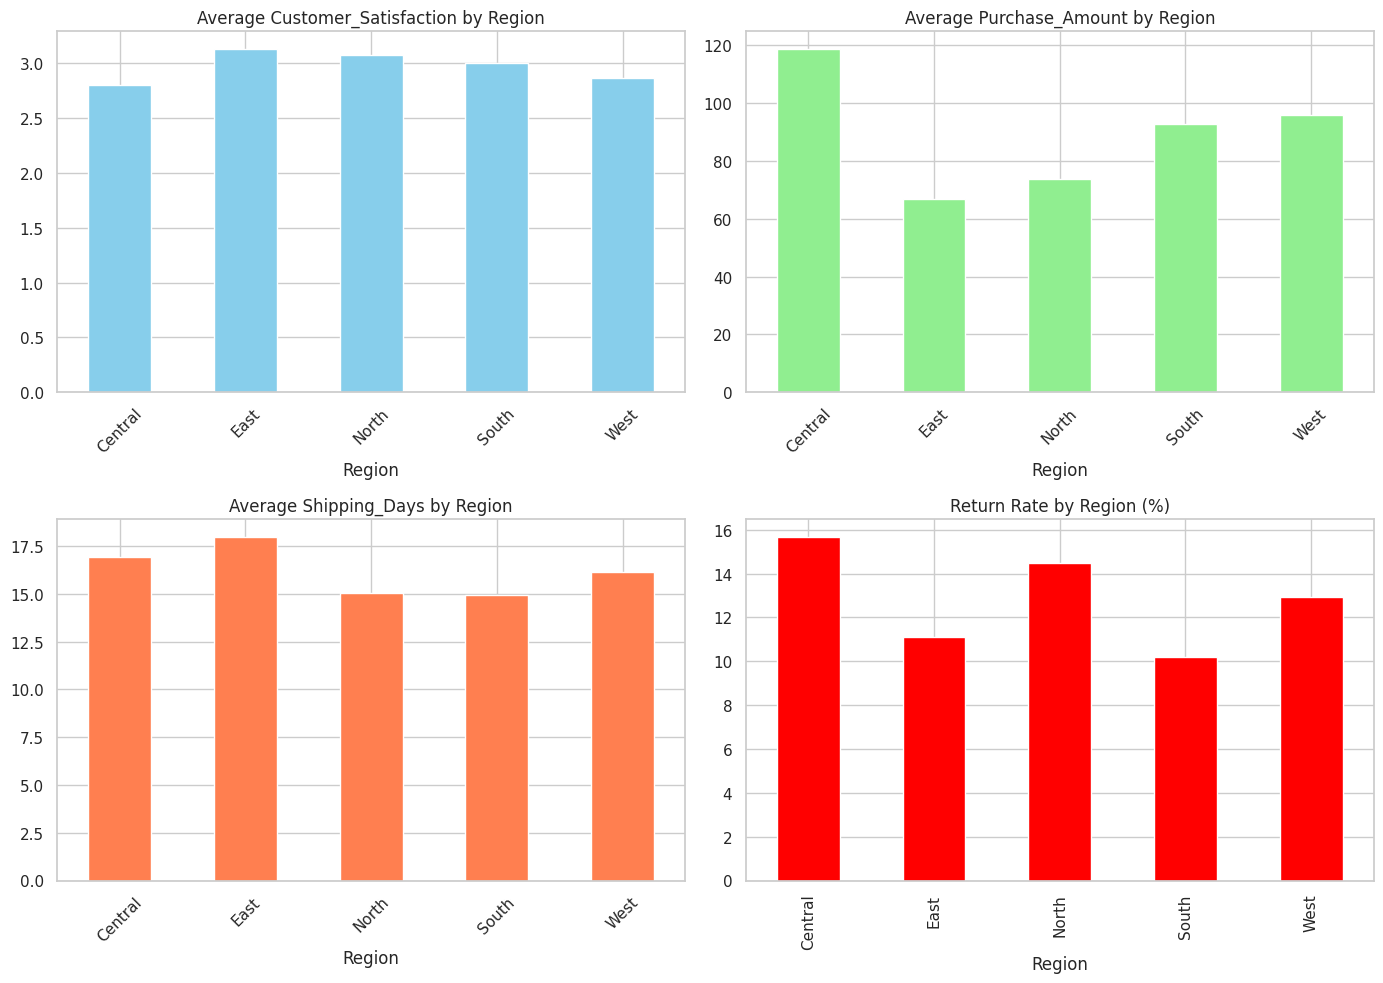

In [57]:
print("\n" + "="*70)
print("QUESTION 2: REGIONAL PERFORMANCE ANALYSIS")
print("="*70)

regional_analysis = df.groupby('Region').agg({
    'Customer_Satisfaction': 'mean',
    'Purchase_Amount': 'mean',
    'Return_Status': lambda x: (x == 'Returned').mean() * 100,
    'Shipping_Days': 'mean'
}).round(2)

print(regional_analysis)

# Regional comparison plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Customer_Satisfaction', 'Purchase_Amount', 'Shipping_Days']
colors = ['skyblue', 'lightgreen', 'coral']

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    regional_analysis[metric].plot(kind='bar', ax=ax, color=colors[i])
    ax.set_title(f'Average {metric} by Region')
    ax.tick_params(axis='x', rotation=45)

# Return rate
return_regional = df[df['Return_Status'] == 'Returned'].groupby('Region').size() / \
                  df.groupby('Region').size() * 100
return_regional.plot(kind='bar', ax=axes[1,1], color='red')
axes[1,1].set_title('Return Rate by Region (%)')

plt.tight_layout()
plt.show()


### QUESTION 3: Product Category Performance



QUESTION 3: PRODUCT CATEGORY PERFORMANCE
                 Customer_Satisfaction       Purchase_Amount Return_Status
                                  mean   std            mean      <lambda>
Product_Category                                                          
Books                             2.90  1.35          105.06         15.38
Clothing                          3.29  1.33           88.52          7.62
Electronics                       2.94  1.42           82.47         17.31
Home                              2.86  1.43           81.31          8.33
Sports                            2.80  1.39           96.15         16.46


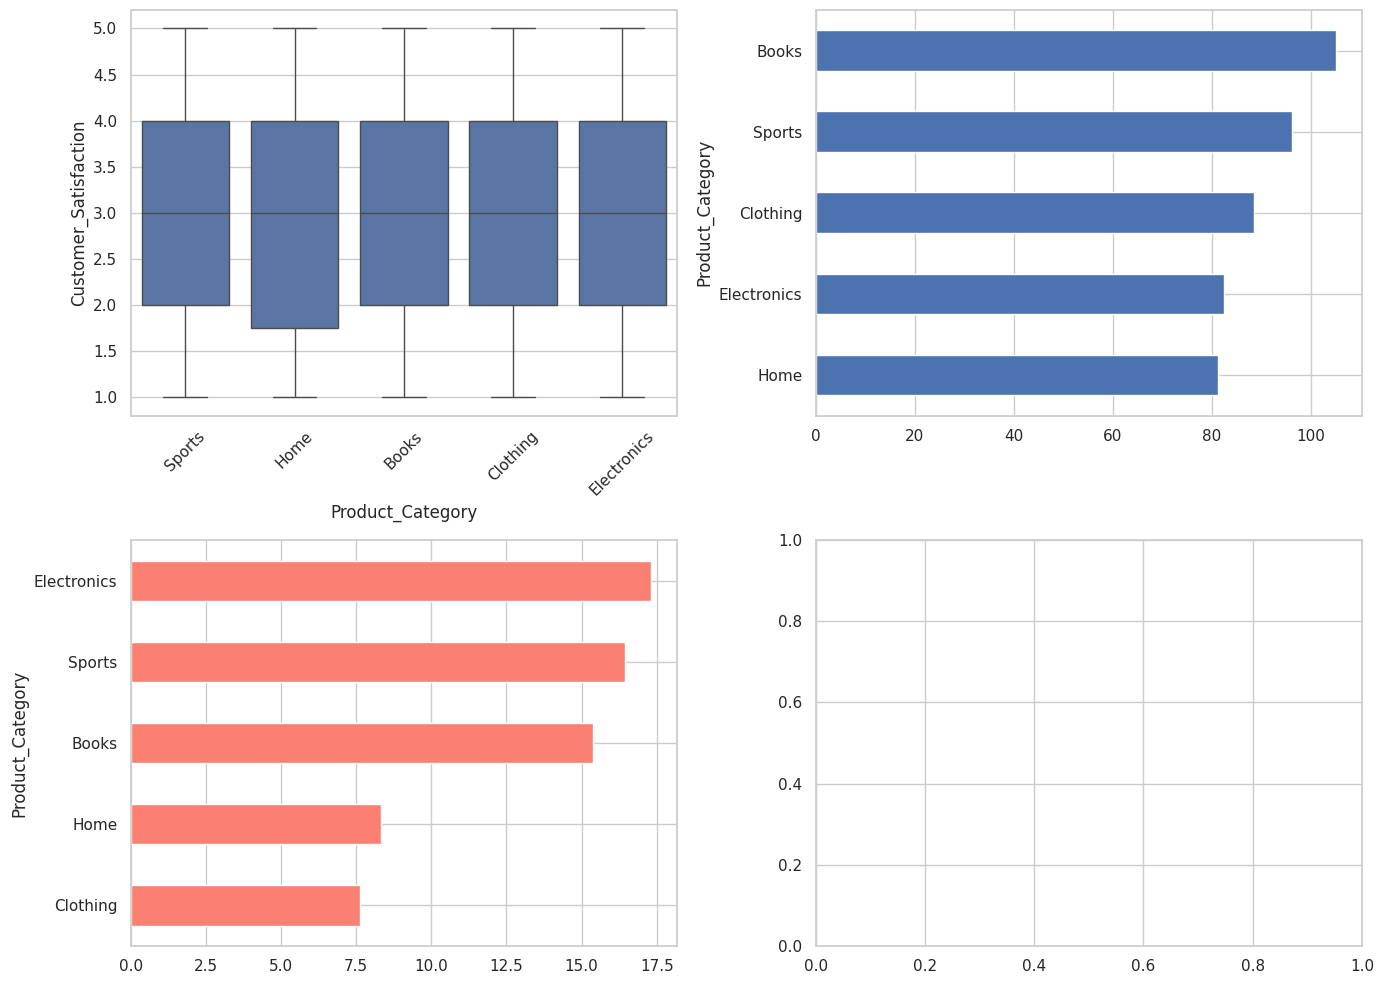

In [58]:
print("\n" + "="*70)
print("QUESTION 3: PRODUCT CATEGORY PERFORMANCE")
print("="*70)

category_analysis = df.groupby('Product_Category').agg({
    'Customer_Satisfaction': ['mean', 'std'],
    'Purchase_Amount': 'mean',
    'Return_Status': lambda x: (x == 'Returned').mean() * 100
}).round(2)

print(category_analysis)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Satisfaction by category
sns.boxplot(data=df, x='Product_Category', y='Customer_Satisfaction', ax=axes[0,0])
axes[0,0].tick_params(axis='x', rotation=45)

# Amount by category
df.groupby('Product_Category')['Purchase_Amount'].mean().sort_values().plot(kind='barh', ax=axes[0,1])

# Return rate
return_category = df[df['Return_Status'] == 'Returned'].groupby('Product_Category').size() / \
                  df.groupby('Product_Category').size() * 100
return_category.sort_values().plot(kind='barh', ax=axes[1,0], color='salmon')

plt.tight_layout()
plt.show()


### QUESTION 4: Discount Strategy Analysis



QUESTION 4: OPTIMAL DISCOUNT STRATEGY
                Customer_Satisfaction  Purchase_Amount  Return_Status
Discount_Level                                                       
0-5%                             2.91            87.36          11.92
6-15%                            3.01            87.90          14.05
16-25%                           2.97            95.88          12.20
25%+                              NaN              NaN            NaN


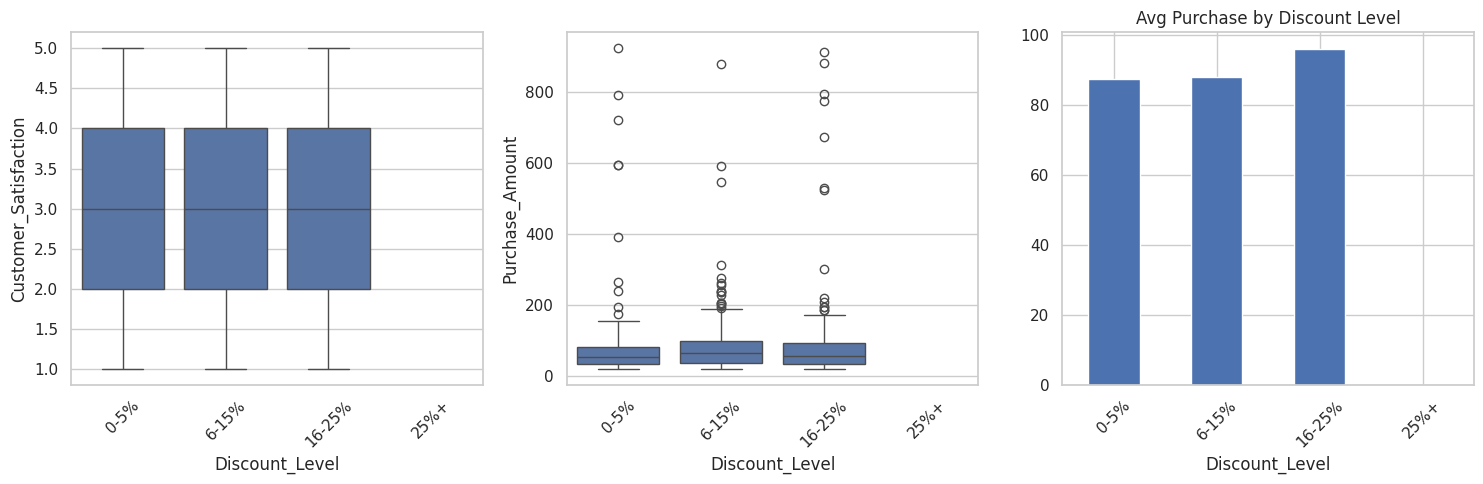

In [60]:
print("\n" + "="*70)
print("QUESTION 4: OPTIMAL DISCOUNT STRATEGY")
print("="*70)

# Discount levels
df['Discount_Level'] = pd.cut(df['Discount_Percentage'],
                             bins=[-1, 5, 15, 25, 30],
                             labels=['0-5%', '6-15%', '16-25%', '25%+'])

discount_analysis = df.groupby('Discount_Level').agg({
    'Customer_Satisfaction': 'mean',
    'Purchase_Amount': 'mean',
    'Return_Status': lambda x: (x == 'Returned').mean() * 100
}).round(2)

print(discount_analysis)

# Plot discount impact
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, x='Discount_Level', y='Customer_Satisfaction', ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Discount_Level', y='Purchase_Amount', ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)

df.groupby('Discount_Level')['Purchase_Amount'].mean().plot(kind='bar', ax=axes[2])
axes[2].set_title('Avg Purchase by Discount Level')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
